In [ ]:
!pip install textblob
!pip install wordcloud
!python -m textblob.download_corpora
!pip install plotly
!pip install wordninja
!pip install pyspellchecker

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
     |████████████████████████████████| 542kB 6.5MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-cp37-none-any.whl size=541553 sha256=18954f38671e1ab1e0ee5051f51dd2888f9fe9e32adf09a8aee099cf641d534c
  Stored in directory: /root/.cache/pip/wheels/22/46/06/9b6d10ed02c85e

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vaccination_all_tweets.csv to vaccination_all_tweets.csv


In [ ]:
df = pd.read_csv("vaccination_all_tweets.csv").dropna()
df

id                     user_name  ... favorites is_retweet
0      1340539111971516416                    Rachel Roh  ...         0      False
2      1337858199140118533                      eli🇱🇹🇪🇺👌  ...         0      False
6      1337851215875608579             Gunther Fehlinger  ...         4      False
9      1337842295857623042                  Ch.Amjad Ali  ...         0      False
10     1337841934170255365                   Tamer Yazar  ...         0      False
...                    ...                           ...  ...       ...        ...
78313  1392827719029649410           Inter Press Service  ...         1      False
78314  1392826970979799041                          yash  ...         0      False
78315  1392826919016488961                Global Tribune  ...         0      False
78317  1392826283608875012  Russian Embassy in Sri Lanka  ...         6      False
78318  1392825939097096193                      ABP LIVE  ...        56      False

[46048 rows x 16 columns]

In [ ]:

print(df.columns)
print(df.shape)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(46048, 16)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46048 entries, 0 to 78318
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                46048 non-null  int64 
 1   user_name         46048 non-null  object
 2   user_location     46048 non-null  object
 3   user_description  46048 non-null  object
 4   user_created      46048 non-null  object
 5   user_followers    46048 non-null  int64 
 6   user_friends      46048 non-null  int64 
 7   user_favourites   46048 non-null  int64 
 8   user_verified     46048 non-null  bool  
 9   date              46048 non-null  object
 10  text              46048 non-null  object
 11  hashtags          46048 non-null  object
 12  source            46048 non-null  object
 13  retweets          46048 non-null  int64 
 14  favorites         46048 non-null  int64 
 15  is_retweet        46048 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 5.4+ MB


In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
df = df.drop_duplicates('text')
print(df.shape)

(45998, 15)


In [ ]:
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
df['text'].transform(clean_tweet_text)
df.head()

user_name                user_location  ... favorites is_retweet
0          Rachel Roh    La Crescenta-Montrose, CA  ...         0      False
2            eli🇱🇹🇪🇺👌                     Your Bed  ...         0      False
6   Gunther Fehlinger  Austria, Ukraine and Kosovo  ...         4      False
9        Ch.Amjad Ali                    Islamabad  ...         0      False
10        Tamer Yazar                Turkey-Israel  ...         0      False

[5 rows x 15 columns]

In [ ]:
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

user_name                user_location  ... favorites is_retweet
0          Rachel Roh    La Crescenta-Montrose, CA  ...         0      False
2            eli🇱🇹🇪🇺👌                     Your Bed  ...         0      False
6   Gunther Fehlinger  Austria, Ukraine and Kosovo  ...         4      False
9        Ch.Amjad Ali                    Islamabad  ...         0      False
10        Tamer Yazar                Turkey-Israel  ...         0      False

[5 rows x 15 columns]

In [ ]:
df.describe()

user_followers   user_friends  ...      retweets     favorites
count    4.599800e+04   45998.000000  ...  45998.000000  45998.000000
mean     1.496714e+05    1520.010674  ...      4.197639     18.795165
std      1.066294e+06    6909.069401  ...     79.055460    268.304877
min      0.000000e+00       0.000000  ...      0.000000      0.000000
25%      1.940000e+02     181.000000  ...      0.000000      0.000000
50%      8.560000e+02     489.000000  ...      0.000000      1.000000
75%      3.789000e+03    1382.000000  ...      1.000000      4.000000
max      1.541562e+07  516578.000000  ...  11288.000000  25724.000000

[8 rows x 5 columns]

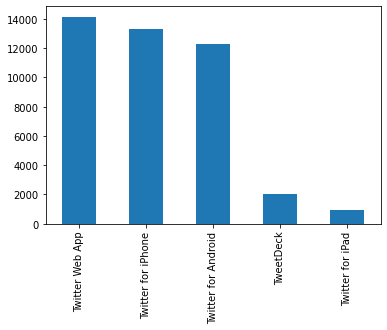

In [ ]:
df['source'].value_counts().head(n=5).plot.bar()

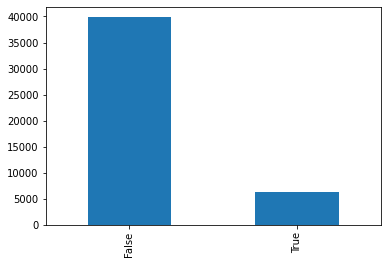

In [ ]:

df['user_verified'].value_counts().head(n=10).plot.bar()

In [ ]:
df[df['user_verified'] == True].head()

user_name    user_location  ... favorites is_retweet
15         City A.M.  London, England  ...         1      False
17             ILKHA          Türkiye  ...         5      False
22         City A.M.  London, England  ...         0      False
43         City A.M.  London, England  ...         2      False
44  Daily News Egypt            Egypt  ...         1      False

[5 rows x 15 columns]

In [ ]:
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

text  ... retweets
68358        RDIF, Laboratorios Richmond launched production of #SputnikV in Argentina, the first country in Latin America to ma… https://t.co/oEMaUwVR92  ...    11288
46053                  Why we need Two Doses of mRNA Vaccine 💉 #vaccines #COVID19 #Pfizer #moderna #VaccinesSaveLives #vaccinated https://t.co/RFRmPAyubD  ...     7695
66822        ICMR study shows #COVAXIN neutralises against multiple variants of SARS-CoV-2 and effectively neutralises the doubl… https://t.co/0IYwr0KymJ  ...     4851
76306  #Argentina's actor breaks into a live TV to show his #SputnikV vaccination certificate &amp; express his gratitude. \n\nT… https://t.co/N1NwjkD83y  ...     2550
17118                                          Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf  ...     2360
53045            I see it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna… https://t.co/eoqT74V78A  ...     2299
7126     New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO  ...     2247
24268        #Covaxin 🇮🇳 , made by Hyderabad-based Bharat Biotech International Limited, has been declared "Safe, Immunogenic wi… https://t.co/FAUOEHJmAw  ...     2095
32826        A batch of fake Sputnik V vaccines was confiscated in Mexico. See this comparison of the genuine #SputnikV with a f… https://t.co/J7PxMq2e1M  ...     1980
17543        Prime Minister Narendra Modi choose early morning time to take #covaxin . No traffic was stopped . Traveled normall… https://t.co/udxAqk9xEC  ...     1980

[10 rows x 7 columns]

In [ ]:
df.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

text  ... retweets
35                              An immigrant Muslim couple find the COVID-19 Vaccine. \n\n#CovidVaccine #PfizerBioNTech #Pfizervaccine #PfizerProud  ...        2
293                 #UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/xvwUEvZZk2  ...        4
25   No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432  ...        1
17           Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F  ...        3
298                 #UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/Lyq594UEks  ...        0
6       it is a bit sad to claim the fame for success of #vaccination on patriotic competition between USA, Canada, UK and… https://t.co/IfMrAyGyTP  ...        0
301    I am beyond relieved to share that I’ll be among the first to receive the #CovidVaccine from #PfizerBioNTech. Thank… https://t.co/1py4jUhGzU  ...        2
18     .@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0  ...        3
16      UPDATED: #YellowFever &amp; #COVID19 #ImmunityPassports - Part Two\n\n#SARSCoV2 #PfizerBioNtech #Britain #December… https://t.co/qKT7Rst9aW  ...        2
21     Anyone wondering why day after #PfizerBioNTech approval in the UK people were getting vaccinated but all we are tol… https://t.co/tPSyL9CUYE  ...        0

[10 rows x 7 columns]

In [ ]:
testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)


In [ ]:
testimonial = TextBlob("I tested positive for COVID-19")
print(testimonial.sentiment)

Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)


In [ ]:
text = """
Today Texas surpassed 8 million vaccinations. It was just 4 days ago that we passed 7 million.

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.

Hospitalizations went down again also.

Great job Texans!

Vaccines are always voluntary, never forced.
"""
blob = TextBlob(text)

In [ ]:
print("Tags")
print(blob.tags, end="\n\n")

print("Noun Phrases")
print(blob.noun_phrases, end="\n\n")

print("Words")
print(blob.words, end="\n\n")

print("Sentences")
print(blob.sentences, end="\n\n")

Tags
[('Today', 'NN'), ('Texas', 'NNP'), ('surpassed', 'VBD'), ('8', 'CD'), ('million', 'CD'), ('vaccinations', 'NNS'), ('It', 'PRP'), ('was', 'VBD'), ('just', 'RB'), ('4', 'CD'), ('days', 'NNS'), ('ago', 'RB'), ('that', 'IN'), ('we', 'PRP'), ('passed', 'VBD'), ('7', 'CD'), ('million', 'CD'), ('The', 'DT'), ('positivity', 'NN'), ('rate', 'NN'), ('dropped', 'VBD'), ('even', 'RB'), ('lower', 'JJR'), ('to', 'TO'), ('6.08', 'CD'), ('%', 'NN'), ('the', 'DT'), ('lowest', 'JJS'), ('since', 'IN'), ('May', 'NNP'), ('31st', 'CD'), ('Hospitalizations', 'NNS'), ('went', 'VBD'), ('down', 'RB'), ('again', 'RB'), ('also', 'RB'), ('Great', 'NNP'), ('job', 'NN'), ('Texans', 'NNPS'), ('Vaccines', 'NNS'), ('are', 'VBP'), ('always', 'RB'), ('voluntary', 'JJ'), ('never', 'RB'), ('forced', 'VBN')]

Noun Phrases
['texas', 'positivity rate', 'may', 'hospitalizations', 'great job', 'vaccines']

Words
['Today', 'Texas', 'surpassed', '8', 'million', 'vaccinations', 'It', 'was', 'just', '4', 'days', 'ago', 'that'

In [ ]:
for sentence in blob.sentences:
    print(sentence)
    print("polarity:", sentence.sentiment.polarity)
    print("subjectivity:", sentence.sentiment.subjectivity)
    print()


Today Texas surpassed 8 million vaccinations.
polarity: 0.0
subjectivity: 0.0

It was just 4 days ago that we passed 7 million.
polarity: 0.0
subjectivity: 0.0

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.
polarity: 0.0
subjectivity: 0.0

Hospitalizations went down again also.
polarity: -0.15555555555555559
subjectivity: 0.2888888888888889

Great job Texans!
polarity: 1.0
subjectivity: 0.75

Vaccines are always voluntary, never forced.
polarity: 0.15000000000000002
subjectivity: 0.2



In [ ]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

user_name                user_location  ... polarity subjectivity
0          Rachel Roh    La Crescenta-Montrose, CA  ...     0.00     0.125000
2            eli🇱🇹🇪🇺👌                     Your Bed  ...     0.00     0.033333
6   Gunther Fehlinger  Austria, Ukraine and Kosovo  ...    -0.10     0.500000
9        Ch.Amjad Ali                    Islamabad  ...     0.00     0.000000
10        Tamer Yazar                Turkey-Israel  ...     0.25     0.333333

[5 rows x 17 columns]

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text major ticklabel objects>)

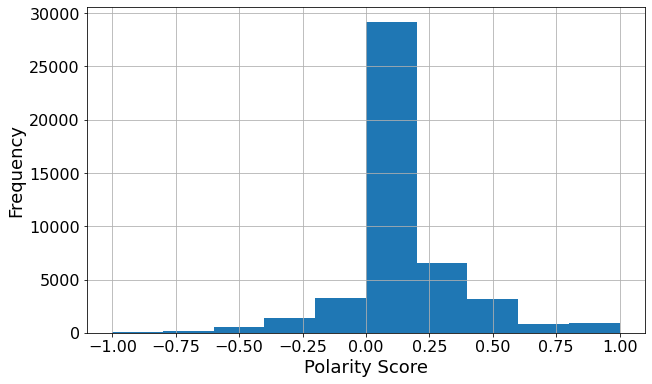

In [ ]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text major ticklabel objects>)

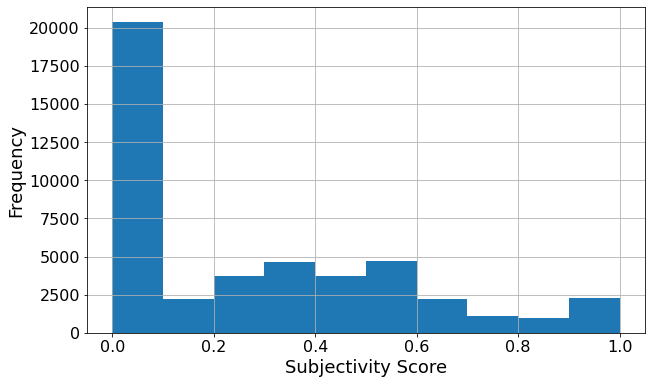

In [ ]:
fig = plt.figure(figsize=(10, 6))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
df.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  ...  subjectivity
0  Dear Twitter,\n\nGot my #Moderna shot #2 on Tuesday.\n12 hrs afterwards be prepared.\n\nThink of the worst hangover you’… https://t.co/7DjuvHHzgt  ...           1.0
1                                                                     ❗⚠️ Horrific reaction to the #Moderna #Covid19.💉😲💥🤯\n\nhttps://t.co/hmpRKhpiVe  ...           1.0
2                                                              @bppoddar terrible and horrible arrangements. No one should get jabbed here. #covaxin  ...           1.0
3       Worst part about having Bell’s Palsy- saying the words Bell’s Palsy while experiencing Bell’s Palsy. #thanksModerna… https://t.co/03lu1EgZJk  ...           1.0
4                            Imagine being one of these 200 kids parents.... fucked up!!! #oxfordastrazeneca\n#vaccination\n https://t.co/ndynQnCy0t  ...           0.7
5                                                                Pharmaceutical greed at its worst...\n\n#PfizerBioNTech \n\nhttps://t.co/nT98jdzMlj  ...           1.0
6              Spread ro anyone who is afraid of taking vaccine!!! #VaccinesWork #CovidVaccine #COVID19 #Covishield #Covaxin https://t.co/88ITsUJ3yB  ...           0.9
7                                                                                    chills all night and now an awful headache #moderna #seconddose  ...           1.0
8        Outrageous that #Moderna #vaccine not approved in #Japan weeks ago. This isn’t the fault of #Moderna or the #EU or… https://t.co/UI0RtbMkJW  ...           1.0
9       #Moderna is simply evil.  If kids don't die from this they will have immune issues that will make them customers of… https://t.co/mBbw2mMxLW  ...           1.0

[10 rows x 3 columns]

In [ ]:
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  ...  subjectivity
0                BEST TRIMMER IN JUST \n                  ➌➎⓿\n\nhttps://t.co/yKS5PEqDDe\n\n#Ayesha #COVAXIN #HBDMKStalin… https://t.co/sGsEp8AZRS  ...         0.300
1  @DalitTalks Dr /Sonia Madam\nClarify use #SocialMedia\nThe best vaccine for Indian #COVID19 #SputnikV\n50 countries ar… https://t.co/D4F9g9950V  ...         0.300
2     When we lost the #SputnikV deal, We lost our greatest weapon in fighting Covid19.  \n\n@StateHouseKenya  @MOH_Kenya… https://t.co/dfF7GSvs0v  ...         1.000
3    Just got my 1st #PfizerBioNTech vaccine 💉, feeling great 😊 \nThe power of science and reason! Very happy how my univ… https://t.co/OltmU1JRtV  ...         0.875
4  @PTI_News Sonia Madam\nClarify use #SocialMedia\nThe best vaccine for Indian #COVID19 #SputnikV\n50 countries are usin… https://t.co/vqMZNotf6z  ...         0.300
5     Questions in 🇧🇦 on whether the authorities agreed on the best conditions when buying #SputnikV🇷🇺 vaccines continue.… https://t.co/74RsA9KxwM  ...         0.300
6                                           Primera Dosis #PfizerBiontech #Covid_19 #YoMeVacuno 10-03-3021 I'm Very Happy, https://t.co/IgKtbwuvsS  ...         1.000
7                            This is a brilliant ! Kudos #BharatBiotech #Covaxin \n\n@BharatBiotech \n\n#AtmaNirbharBharat https://t.co/SYoLBq1fQS  ...         1.000
8                                         So proud of my boys!! #dogood #bethegood #science💉🦠 #Moderna #vaccinate #COVID19 https://t.co/9S7JsY4pqT  ...         1.000
9  @PTI_News Sonia Madam\nClarify use #SocialMedia\nThe best vaccine for Indian #COVID19 #SputnikV\n50 countries are usin… https://t.co/EaEFaRnUCq  ...         0.300

[10 rows x 3 columns]

In [ ]:
df.sort_values(by='subjectivity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  ...  subjectivity
0                                                                            I'm officially fully vaccinated. Yay me!\n#COVIDVaccination #Moderna  ...           0.0
1                                                                             @UN BREAKING NEWS :  #SputnikV approved for emergency use in India.  ...           0.0
2  Centre approves Russia’s Covid-19 vaccine Sputnik V \n\n#SputnikV is the third vaccine approved by India after Covish… https://t.co/XC7mJ3pnZe  ...           0.0
3                                                                                                                           #SputnikV approved...  ...           0.0
4                                                               What the #Moderna vials look like #COVID19 #GetVaccinated https://t.co/N043p39G86  ...           0.0
5                                            1st dose #moderna #covid19 #vaccine! I got my shot! @ Durham, North Carolina https://t.co/HDRI8hKm4M  ...           0.0
6                                                     #BigBreaking #SputnikV is the third vaccine approved by India after Covishield and Covaxin.  ...           0.0
7    @WSJ Here are the comparisons of #Moderna #Pfizer_BioNTech #JohnsonAndJohnson #astrazenecavaccine #Novavax #Sputnik… https://t.co/XbAK6LDhKp  ...           0.0
8         Here are the comparisons of #Moderna #Pfizer_BioNTech #JohnsonAndJohnson #astrazenecavaccine #Novavax #Sputnik… https://t.co/TzyTr1FgwO  ...           0.0
9                                                                     @JM_Scindia BREAKING NEWS :  #SputnikV approved for emergency use in India.  ...           0.0

[10 rows x 3 columns]

In [ ]:
df.sort_values(by='subjectivity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  ...  subjectivity
0  Pick out  your favorite link in\nbio 👈☝\n#Dek64 #s0304 #seymasubasi #MilanSampdoria #شوقردادي #مبادل_الحفر #منا_وفينا… https://t.co/oo5F9T9yyN  ...           1.0
1    IMPORTANT 👉 There are the results of the work of @GamarnikLab and colleagues at the PBA: shows that the #SputnikV v… https://t.co/7RaAFaz2mW  ...           1.0
2                       Happy #valentinesday2021...\n\n#PfizerVaccine\n#PfizerBiontech \n@adarpoonawalla\n@SerumInstIndia https://t.co/StJmLWEqNr  ...           1.0
3    @Saka_m97 @martka1725 @vonderleyen @EU_Commission @FT The only place #EU can get #covid #vaccines immediately is US… https://t.co/7EVu3k4aUy  ...           1.0
4                                         FINALLY. \n#moderna #2\n#getvaxxed\n#wearamask\n#dothethings @ Des Moines, Iowa https://t.co/DY2WeBcUof  ...           1.0
5                                         Brilliant 👏🇬🇧 #COVID19Vaccine #AstraZeneca #OxfordAstraZeneca #oxforduniversity https://t.co/nRU5TlmPSg  ...           1.0
6    💉 The EU hasn't engaged in negotiations with Russia on a potential purchase of #SputnikV vaccine against the corona… https://t.co/01cUq7LmAt  ...           1.0
7    Possible Link Between #AstraZeneca  COVID-19 Vaccine and Blood Clots: Under 30s to be given Pfizer’s or #Moderna  m… https://t.co/oTHH2xyjUP  ...           1.0
8                    #Hialeah secures partnership to distribute #Moderna #CovidVaccine as #FEMA sites move to only offer… https://t.co/dx5guhIwe5  ...           1.0
9                                                                                        Happy #WorldHealthDay!! #Moderna https://t.co/xw4ScEqEdq  ...           1.0

[10 rows x 3 columns]

In [ ]:
timeline = df.groupby(['date']).count().reset_index()
timeline['count'] = timeline['text']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()

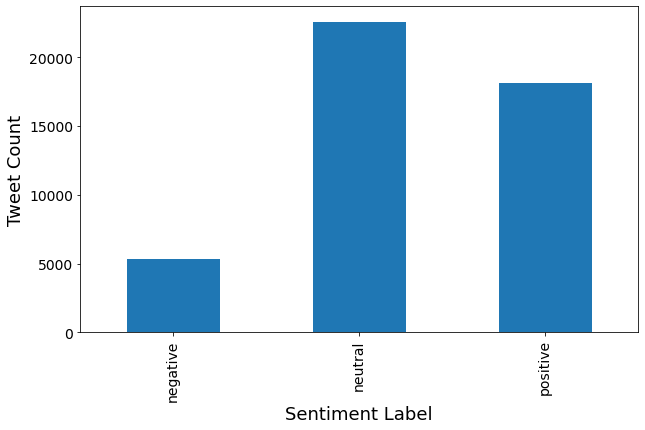

<Figure size 432x288 with 0 Axes>

In [ ]:
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

In [ ]:
df

user_name  ... sentiment
0                        Rachel Roh  ...   neutral
2                          eli🇱🇹🇪🇺👌  ...   neutral
6                 Gunther Fehlinger  ...  negative
9                      Ch.Amjad Ali  ...   neutral
10                      Tamer Yazar  ...  positive
...                             ...  ...       ...
78313           Inter Press Service  ...  positive
78314                          yash  ...  positive
78315                Global Tribune  ...  positive
78317  Russian Embassy in Sri Lanka  ...   neutral
78318                      ABP LIVE  ...  positive

[45998 rows x 18 columns]

In [ ]:
df_title_csv = df.copy()

# Convert dates
df_title_csv['date'] = pd.to_datetime(df_title_csv['date'], errors='coerce').dt.date

# Get counts of number of tweets by sentiment for each date
timeline = df_title_csv.groupby(['date', 'sentiment']).count().reset_index().dropna()

fig = px.line(timeline, x='date', y='text', color='sentiment', color_discrete_sequence=["#EF553B", "#636EFA", "#00CC96"], category_orders={'sentiment': ['neutral', 'negative', 'positive']},title='Timeline showing sentiment of tweets about COVID-19 vaccines')
fig.show()

In [ ]:
timeline = df.groupby(['date']).agg(np.nanmean).reset_index()
timeline['count'] = df.groupby(['date']).count().reset_index()['retweets']
timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

date  count  polarity  retweets  favorites  subjectivity
0    2020-12-12     38  0.034952  0.631579   2.868421      0.227801
1    2020-12-13     52  0.055937  1.942308   7.500000      0.255696
2    2020-12-14     83  0.116874  4.698795  29.204819      0.267803
3    2020-12-15     87  0.094041  1.022989   7.333333      0.258078
4    2020-12-16     78  0.104020  1.000000   5.115385      0.248872
..          ...    ...       ...       ...        ...           ...
136  2021-05-17    676  0.088669  3.758876  22.665680      0.242953
137  2021-05-18    639  0.074013  2.025039  10.943662      0.241400
138  2021-05-19    654  0.090741  7.018349  37.460245      0.252863
139  2021-05-20    691  0.090425  2.565847  16.144718      0.237433
140  2021-05-21    159  0.069193  0.597484   2.427673      0.214424

[141 rows x 6 columns]

In [ ]:
timeline.sort_values(by='polarity', ascending=False)

date  count  polarity  retweets  favorites  subjectivity
12   2020-12-24     70  0.184387  3.657143  17.842857      0.310656
31   2021-01-12     52  0.182608  0.961538   6.961538      0.271700
19   2020-12-31     38  0.169196  1.184211   7.342105      0.282442
16   2020-12-28     26  0.165737  1.461538   4.769231      0.292030
33   2021-01-14     64  0.163502  0.843750   6.531250      0.268629
..          ...    ...       ...       ...        ...           ...
1    2020-12-13     52  0.055937  1.942308   7.500000      0.255696
124  2021-04-15    880  0.052703  3.839773  13.904545      0.258732
35   2021-01-16     82  0.039450  9.670732  17.024390      0.262114
0    2020-12-12     38  0.034952  0.631579   2.868421      0.227801
49   2021-01-30     34  0.010938  2.352941  14.705882      0.402106

[141 rows x 6 columns]

In [ ]:
df[df['date'].astype(str) == '2021-01-12'][['user_location', 'date', 'text', 'hashtags', 'polarity', 'subjectivity', 'sentiment']]

user_location        date  ... subjectivity sentiment
2416                Northern Ireland  2021-01-12  ...     0.350000  positive
2531             Nottingham, England  2021-01-12  ...     0.700000  positive
2952  Ragbag Of Reviews And Insights  2021-01-12  ...     0.500000  positive
3121               Corleone, Sicilia  2021-01-12  ...     0.333333  positive
3124                      London, UK  2021-01-12  ...     0.000000   neutral
3128    Vienna, Dublin, & Cyberspace  2021-01-12  ...     0.572619  negative
3131                              UK  2021-01-12  ...     0.000000   neutral
3132             South West, England  2021-01-12  ...     0.624444  positive
3133            Southampton, England  2021-01-12  ...     0.416667  positive
3134                         Belgium  2021-01-12  ...     0.000000   neutral
3135                           Crewe  2021-01-12  ...     0.600000  positive
3136        Warrington, Cheshire, UK  2021-01-12  ...     0.300000  positive
3145                  United Kingdom  2021-01-12  ...     0.378571  positive
3146            GP Partner, Watford   2021-01-12  ...     0.000000   neutral
3147              Khyber Pakhtunkhwa  2021-01-12  ...     0.650000  positive
3148  CPT SA Defending the underdog☑  2021-01-12  ...     0.000000   neutral
3155                      Tucson, AZ  2021-01-12  ...     0.000000   neutral
3255                        Anglesey  2021-01-12  ...     0.000000   neutral
3256             Melbourne, Victoria  2021-01-12  ...     0.483333  positive
3258             Melbourne, Victoria  2021-01-12  ...     0.900000  positive
3263                   Oklahoma, USA  2021-01-12  ...     0.000000   neutral
3264  London,UK + W.Balkans + Global  2021-01-12  ...     0.916667  positive
3265              Bucharest, Romania  2021-01-12  ...     0.200000  positive
3266         England, United Kingdom  2021-01-12  ...     0.066667   neutral
3267                     Chicago, IL  2021-01-12  ...     0.000000   neutral
3268      Silicon Valley, California  2021-01-12  ...     0.066667  negative
3270             Chichester, England  2021-01-12  ...     0.333333  positive
3271                     India | USA  2021-01-12  ...     0.500000  positive
3273                     📍NJ/PA, USA  2021-01-12  ...     0.000000   neutral
3274                 In a Good Place  2021-01-12  ...     0.000000  negative
3279                          Cyprus  2021-01-12  ...     0.250000  positive
3282                              UK  2021-01-12  ...     1.000000  positive
3284                 London, England  2021-01-12  ...     0.000000   neutral
3285                              UK  2021-01-12  ...     0.000000   neutral
3287                     Houston, TX  2021-01-12  ...     0.300000  positive
3289        Oxfordshire & Birmingham  2021-01-12  ...     0.316667  positive
3293                         Tunisia  2021-01-12  ...     0.000000   neutral
3294                             USA  2021-01-12  ...     0.100000  positive
3295                    Bellevue, WA  2021-01-12  ...     0.750000  positive
3298                   Nashville, TN  2021-01-12  ...     0.000000   neutral
3299           A State of Depression  2021-01-12  ...     0.200000  positive
3302                    New York, NY  2021-01-12  ...     0.000000   neutral
3303                         London   2021-01-12  ...     0.300000  positive
3304                      Durham, NC  2021-01-12  ...     0.575000  positive
3305                 California, USA  2021-01-12  ...     0.000000   neutral
3310               Waterford Ireland  2021-01-12  ...     0.411111  positive
3311                          Israel  2021-01-12  ...     0.000000   neutral
3312     Dubai, United Arab Emirates  2021-01-12  ...     0.000000   neutral
3313                        Hungary   2021-01-12  ...     0.333333  positive
3314                   Edinburgh, UK  2021-01-12  ...     0.400000  positive
3315                         Greece   2021-01-12  ...     0.000000   neutral
3316              L

In [ ]:
fig = px.bar(timeline, x='date', y='count', color='polarity')
fig.show()

In [ ]:
fig = px.bar(timeline, x='date', y='count', color='subjectivity')
fig.show()

In [ ]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine-- not very helpful!
def filter_by_vaccy(df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(df[df['text'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['date']).count().reset_index()['retweets']
    timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt, timeline

In [ ]:
pfizy_df, pfizy_timeline = filter_by_vaccy(df, ['pfizer', 'biontech'])
print(pfizy_df.shape)
fig = px.bar(pfizy_timeline, x='date', y='count', color='polarity')
fig.show()

(6918, 18)


In [ ]:

moderna_df, moderna_timeline = filter_by_vaccy(df, ['moderna'])
print(moderna_df.shape)
fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
fig.show()

(11103, 18)


In [ ]:

astra_df, astra_timeline = filter_by_vaccy(df, ['astrazeneca','oxford'])
astra_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

user_name  ... sentiment
0                                          Char  ...  negative
1                        SAVE THE HUMAN FACE 🙂🌸  ...  negative
2                           Terry Crocker⚒⚒🇬🇧🇬🇧  ...  negative
3                        SAVE THE HUMAN FACE 🙂🌸  ...  negative
4   vince #FBPE #ABTV #WATON #loveNHS #rejoineu  ...  negative
5   vince #FBPE #ABTV #WATON #loveNHS #rejoineu  ...  negative
6                        Maskless Lady V 🌸🇬🇧⚖✝️  ...  negative
7                           Terry Crocker⚒⚒🇬🇧🇬🇧  ...  negative
8                        Maskless Lady V 🌸🇬🇧⚖✝️  ...  negative
9                                          Char  ...  negative
10                                 heidi hodges  ...  negative
11                                        Chris  ...  negative
12                                        Chris  ...  negative
13                                 heidi hodges  ...  negative
14                                  Johnny P 🇾🇪  ...  negative
15                                 Kieran Peers  ...  negative
16                                 Kieran Peers  ...  negative
17                                 1314 🏴󠁧󠁢󠁳󠁣󠁴󠁿  ...  negative
18                                 1314 🏴󠁧󠁢󠁳󠁣󠁴󠁿  ...  negative
19                                Robert Bailey  ...  negative

[20 rows x 18 columns]

In [ ]:
covaxin_df, covaxin_timeline = filter_by_vaccy(df, ['covaxin'])
covaxin_df.sort_values(by='polarity', ascending=True).reset_index(drop=True).head(n=20)

user_name            user_location  ... subjectivity sentiment
0              Akriti Dokania          London, England  ...     1.000000  negative
1                 Bhakt 🇮🇳🌷🇮🇳         वसुधैव कुटुंबकम्  ...     1.000000  negative
2                      अजित..            Nashik, India  ...     1.000000  negative
3              Rupinder Sayal                    India  ...     1.000000  negative
4                   Nikhil K.            Mumbai, India  ...     1.000000  negative
5             shreekant kumar    Ahmadabad City, India  ...     1.000000  negative
6                    theHammy          California, USA  ...     1.000000  negative
7            Prasenjit Bhakat  Jhargram,W Bengal,India  ...     1.000000  negative
8                      Gurjot            Punjab, India  ...     1.000000  negative
9            Prasenjit Bhakat  Jhargram,W Bengal,India  ...     1.000000  negative
10        Sri Sri Mumbaitiger  ÜT: 18.987942,72.813965  ...     0.900000  negative
11                     Balaji                Bengaluru  ...     1.000000  negative
12  Dilip Jain | दिलीप जैन 🇮🇳         Bengaluru, India  ...     0.900000  negative
13                The Delhite         New Delhi, India  ...     0.800000  negative
14                  Yagyaseni      Mera Bharat Mahaan   ...     0.900000  negative
15                     Orunda                Hindustan  ...     1.000000  negative
16                        #BC           United Kingdom  ...     1.000000  negative
17               Abhinjoy Pal                  kolkata  ...     1.000000  negative
18            UjjwalPantWords         New Delhi, India  ...     0.704167  negative
19                       Aroh                Ahmedabad  ...     0.857143  negative

[20 rows x 18 columns]

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(-0.5, 999.5, 499.5, -0.5)

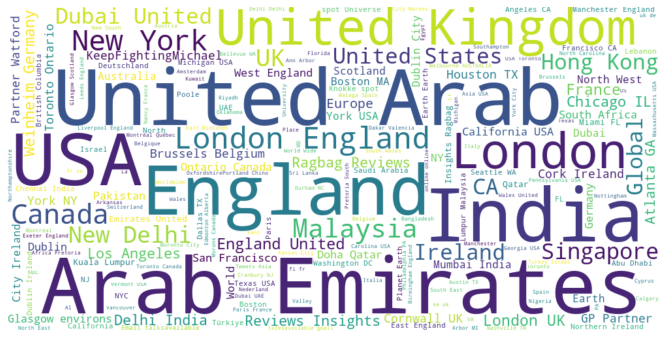

In [ ]:
tweet_df = pfizy_df
words = ' '.join([word for word in tweet_df['user_location']])
word_cloud = WordCloud(background_color='white', width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
india_words = df
values = india_words['user_location'] == "India"
india_words = india_words.loc[values]
print(india_words.head())

               user_name user_location  ... subjectivity sentiment
75   Prof. Manish Thakur         India  ...     0.000000   neutral
94          India Blooms         India  ...     0.000000   neutral
131        Rachna Tandon         India  ...     0.416667  positive
159            India.com         India  ...     0.450000  negative
447       Business Today         India  ...     0.000000   neutral

[5 rows x 18 columns]


In [ ]:
delhi_words = df
values = delhi_words['user_location'] == "New Delhi"
delhi_words = delhi_words.loc[values]
print(delhi_words.head())
print(len(delhi_words))

        user_name user_location  ... subjectivity sentiment
104   IANS Tweets     New Delhi  ...     0.000000   neutral
245   IANS Tweets     New Delhi  ...     0.333333  positive
259   IANS Tweets     New Delhi  ...     0.000000   neutral
1416  IANS Tweets     New Delhi  ...     0.000000   neutral
1443  IANS Tweets     New Delhi  ...     0.333333  positive

[5 rows x 18 columns]
404


In [ ]:
usa_words = df
values = usa_words['user_location'] == "USA"
usa_words = usa_words.loc[values]
print(usa_words.head())

           user_name user_location  ... subjectivity sentiment
176      FedUpWitGop           USA  ...     0.000000   neutral
348   Michael Shiloh           USA  ...     0.083333  positive
761  David Usharauli           USA  ...     0.600000  negative
847  David Usharauli           USA  ...     0.000000   neutral
896      Moose's mom           USA  ...     0.000000   neutral

[5 rows x 18 columns]


In [ ]:
uk_words = df
values = uk_words['user_location'] == "United Kingdom"
uk_words = uk_words.loc[values]

london_words = df
london_values = london_words['user_location'] == "London"
london_words = london_words.loc[values]

concat_list = [uk_words, london_words]
united_words = pd.concat(concat_list)
print(united_words.head())

                    user_name   user_location  ... subjectivity sentiment
438  Greatest Hits Radio News  United Kingdom  ...        0.000   neutral
551               PharmaSense  United Kingdom  ...        0.525  positive
619                Dr. Naveed  United Kingdom  ...        1.000  positive
811      Michael Gbadebo FRSA  United Kingdom  ...        0.000   neutral
984           Prof Asif Ahmed  United Kingdom  ...        0.500  positive

[5 rows x 18 columns]


In [ ]:
dubai_words = df
values = dubai_words['user_location'] == "Dubai"
dubai_words = dubai_words.loc[values]

qatar_words = df
qatar_values = qatar_words['user_location'] == "Qatar"
qatar_words = qatar_words.loc[values]

concat_list = [dubai_words, qatar_words]
uae_words = pd.concat(concat_list)
print(uae_words.head())
print(len(uae_words))

               user_name user_location  ... subjectivity sentiment
1152          TheBrew.ae         Dubai  ...     0.400000  positive
1160          TheBrew.ae         Dubai  ...     0.666667  positive
1391   Abhishek Sengupta         Dubai  ...     0.633333  positive
5333        Yeliz Hisman         Dubai  ...     0.333333  positive
8382  Al Arabiya English         Dubai  ...     0.475000  positive

[5 rows x 18 columns]
116


In [ ]:
germany_words = df
values = germany_words['user_location'] == "Germany"
germany_words = germany_words.loc[values]
print(germany_words.head())

                        user_name user_location  ... subjectivity sentiment
974                         Elmar       Germany  ...     1.000000  positive
1338                    bpbrother       Germany  ...     0.500000  positive
1501      Paul's Think Tank🇪🇺🇺🇳🌻💚       Germany  ...     0.375000  negative
1747  Dr. Christopher Thomas Ford       Germany  ...     0.000000   neutral
3890           Mark Angelo Riotoc       Germany  ...     0.333333  positive

[5 rows x 18 columns]


In [ ]:
france_words = df
values = france_words['user_location'] == "France"
france_words = france_words.loc[values]
print(france_words.head())
print(len(france_words))

           user_name user_location  ... subjectivity sentiment
109  AFP News Agency        France  ...     0.393939  positive
227  AFP News Agency        France  ...     0.000000   neutral
403  AFP News Agency        France  ...     0.600000  positive
628      Naked Royal        France  ...     0.000000   neutral
728  AFP News Agency        France  ...     0.000000   neutral

[5 rows x 18 columns]
138


In [ ]:
canada_words = df
values = canada_words['user_location'] == "Canada"
canada_words = canada_words.loc[values]
print(canada_words.head())

                      user_name user_location  ... subjectivity sentiment
100  Kraken-Elect AsuAdanac 🇨🇦💙        Canada  ...     0.000000   neutral
220        Dick Bourgeois-Doyle        Canada  ...     0.483333  positive
408              Michael Caesar        Canada  ...     0.700000  positive
463              Michael Caesar        Canada  ...     0.311111  positive
545            Jacqueline Roche        Canada  ...     0.000000   neutral

[5 rows x 18 columns]


In [ ]:
malaysia_words = df
values = malaysia_words['user_location'] == "Malaysia"
malaysia_words = malaysia_words.loc[values]
print(malaysia_words.head())
len(malaysia_words)

               user_name user_location  ... subjectivity sentiment
318  Free Malaysia Today      Malaysia  ...     0.000000   neutral
446    New Straits Times      Malaysia  ...     0.260000  negative
488    New Straits Times      Malaysia  ...     0.666667  negative
509  Free Malaysia Today      Malaysia  ...     0.650000  positive
652    New Straits Times      Malaysia  ...     0.000000   neutral

[5 rows x 18 columns]


181

In [ ]:
singapore_words = df
values = singapore_words['user_location'] == "Singapore"
singapore_words = singapore_words.loc[values]
print(singapore_words.head())
len(singapore_words)

             user_name user_location  ... subjectivity sentiment
150   swaliya naikwadi     Singapore  ...     0.550000  positive
152        keval singh     Singapore  ...     0.566667  positive
988        Asiya Bakht     Singapore  ...     0.541667  positive
1342         kid minty     Singapore  ...     0.535714  positive
3052            Custer     Singapore  ...     0.333333  positive

[5 rows x 18 columns]


77

In [ ]:
china_words = df
values = china_words['user_location'] == "China"
china_words = china_words.loc[values]
print(china_words.head())
len(china_words)

           user_name user_location  ... subjectivity sentiment
5351        Pandaily         China  ...     0.288889  positive
10922       Pandaily         China  ...     0.333333  positive
12161       Pandaily         China  ...     0.500000  positive
14735       Pandaily         China  ...     0.324242  positive
28834  KurundaiLawry         China  ...     0.000000   neutral

[5 rows x 18 columns]


7

In [ ]:
hk_words = df
values = hk_words['user_location'] == "Hong Kong"
hk_words = hk_words.loc[values]
print(hk_words.head())
len(hk_words)

                    user_name user_location  ... subjectivity sentiment
147           Akanksha Sharma     Hong Kong  ...     0.366667  positive
1448  Debajyoti Chowdhury PhD     Hong Kong  ...     0.833333  positive
3157            ActivistBowen     Hong Kong  ...     0.000000   neutral
3741            ActivistBowen     Hong Kong  ...     0.000000   neutral
3742            ActivistBowen     Hong Kong  ...     0.000000   neutral

[5 rows x 18 columns]


160

(-0.5, 999.5, 499.5, -0.5)

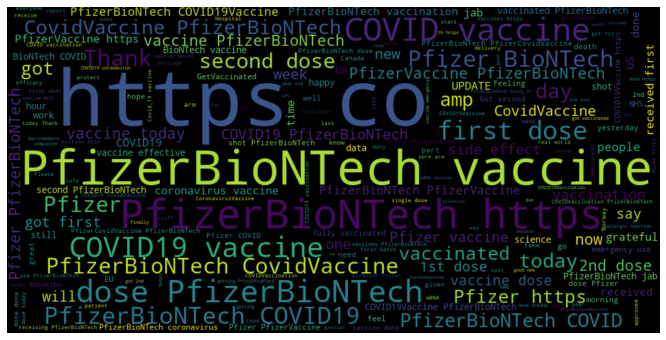

In [ ]:
tweet_df = pfizy_df
words = ' '.join([word for word in tweet_df['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
#     plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words
    
def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud

None


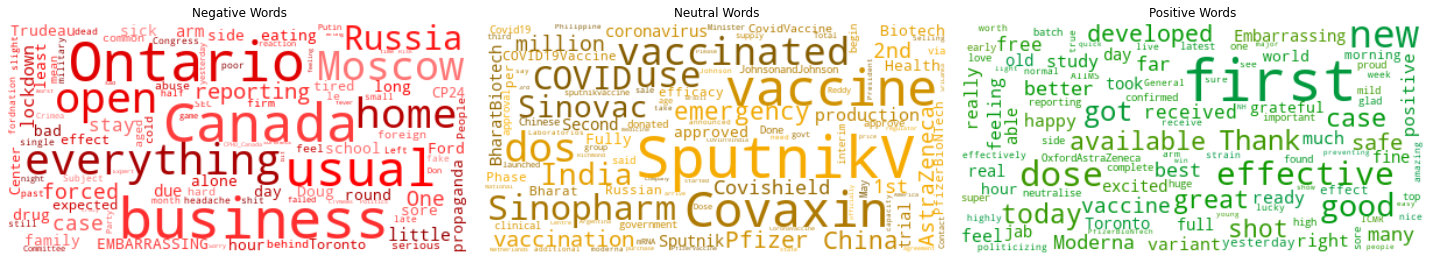

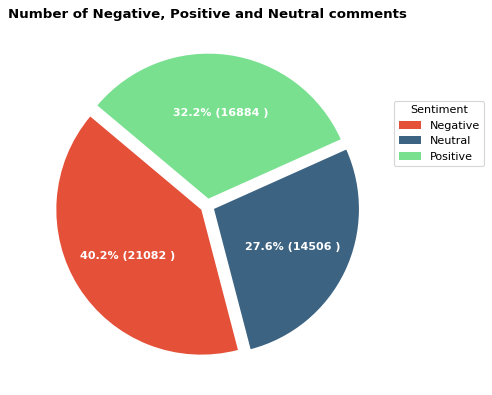

In [ ]:
def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig, neg_doc_final, neu_doc_final, pos_doc_final

# Convert string to a list of words
wordcloud_df = df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments", fontsize=12, fontweight="bold")
plt.show()

None


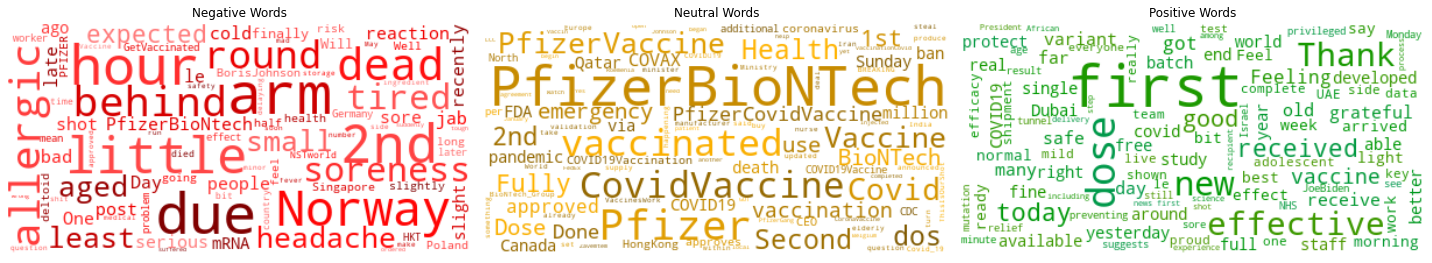

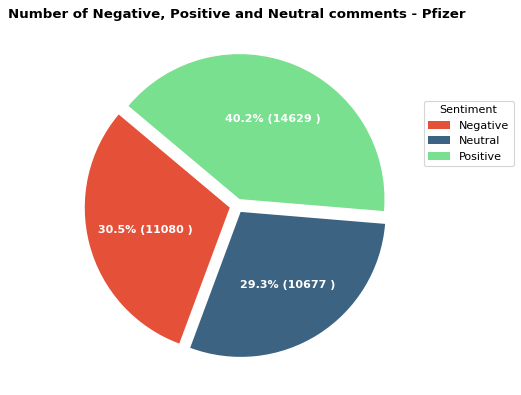

In [ ]:
wordcloud_df = pfizy_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Pfizer", fontsize=12, fontweight="bold")
plt.show()

None


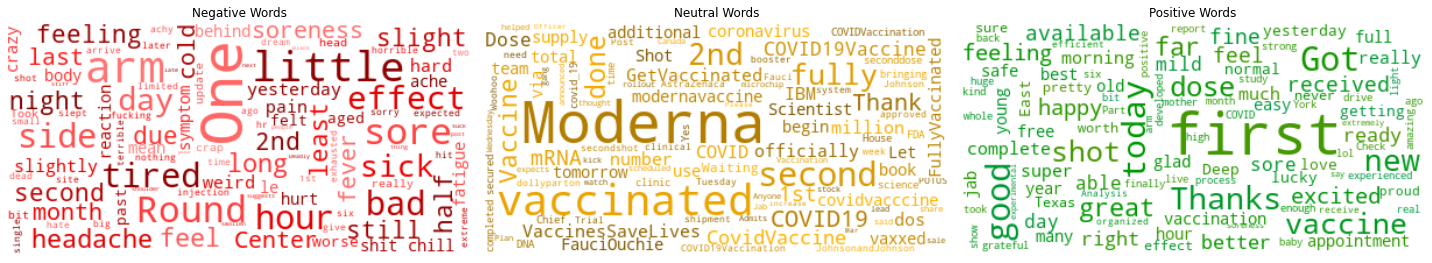

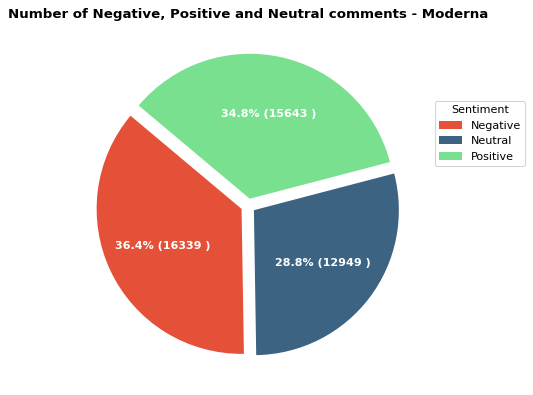

In [ ]:
wordcloud_df = moderna_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Moderna", fontsize=12, fontweight="bold")
plt.show()

None


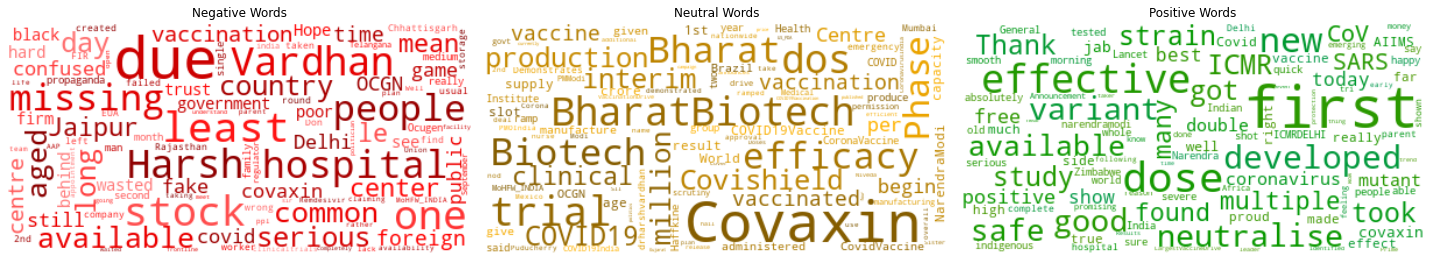

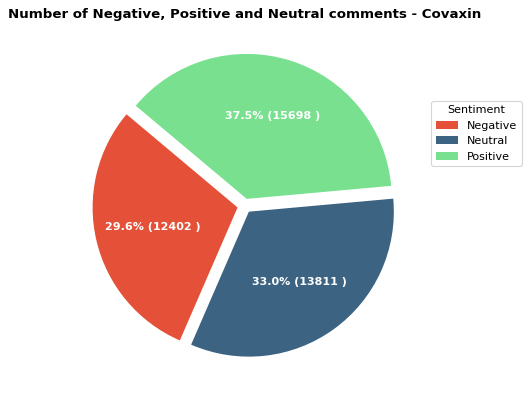

In [ ]:
wordcloud_df = covaxin_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Covaxin", fontsize=12, fontweight="bold")
plt.show()

In [ ]:
sinopharm_df, sinopharm_timeline = filter_by_vaccy(df, ['sinopharm'])

None


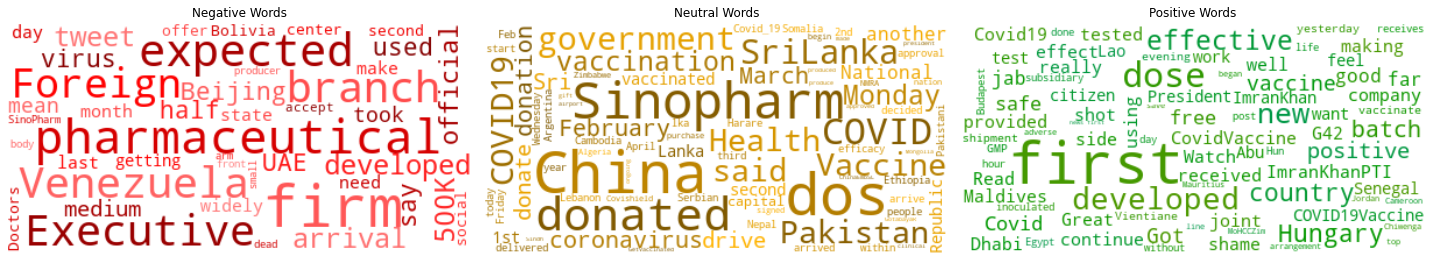

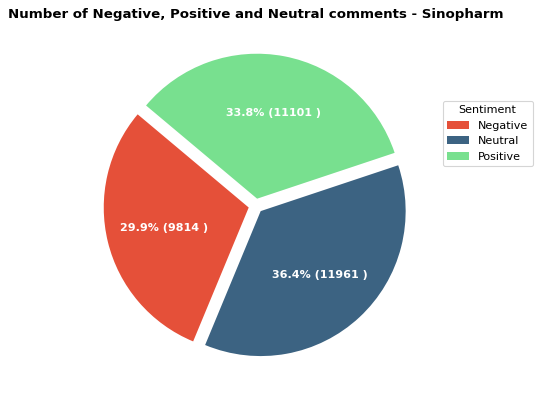

In [ ]:
wordcloud_df = sinopharm_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Sinopharm", fontsize=12, fontweight="bold")
plt.show()

In [ ]:
sinovac_df, sinovac_timeline = filter_by_vaccy(df, ['sinovac'])

None


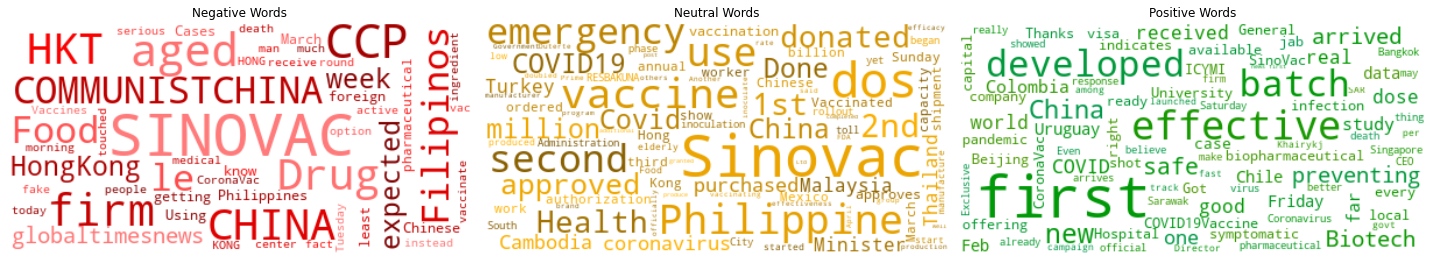

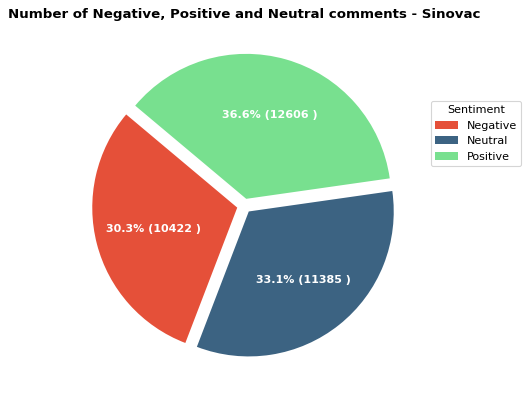

In [ ]:
wordcloud_df = sinovac_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Sinovac", fontsize=12, fontweight="bold")
plt.show()

None


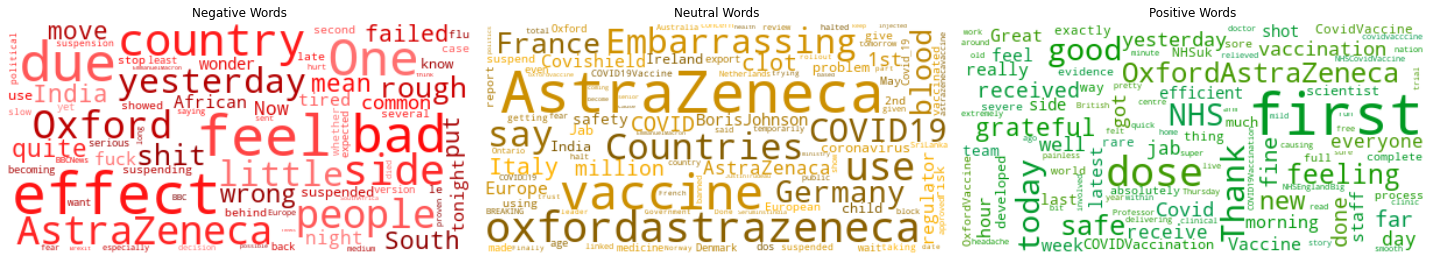

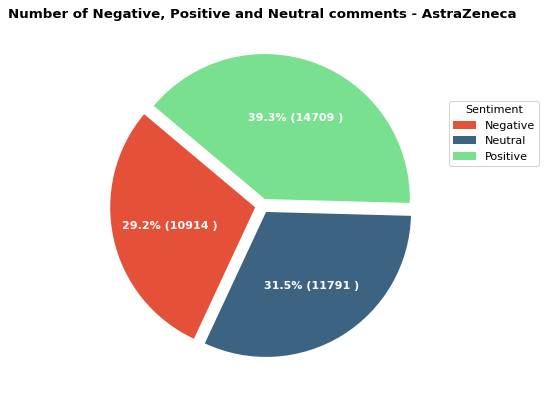

In [ ]:
wordcloud_df = astra_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - AstraZeneca", fontsize=12, fontweight="bold")
plt.show()

In [ ]:
sputnik_df, sputnik_timeline = filter_by_vaccy(df, ['sputnik'])

None


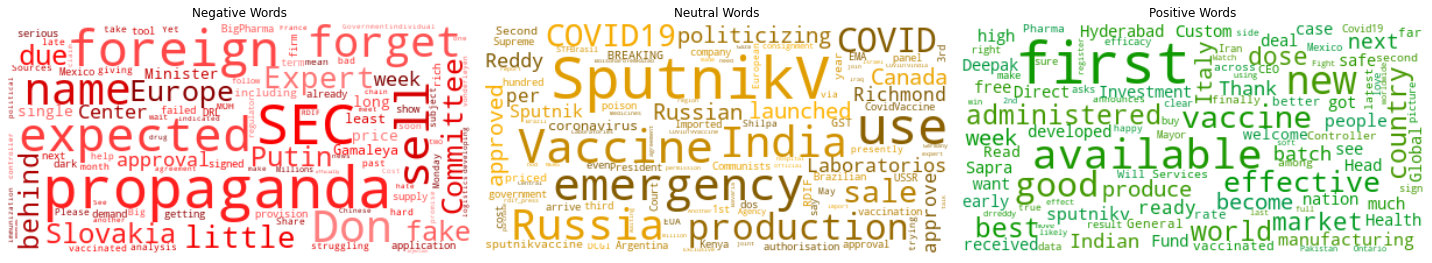

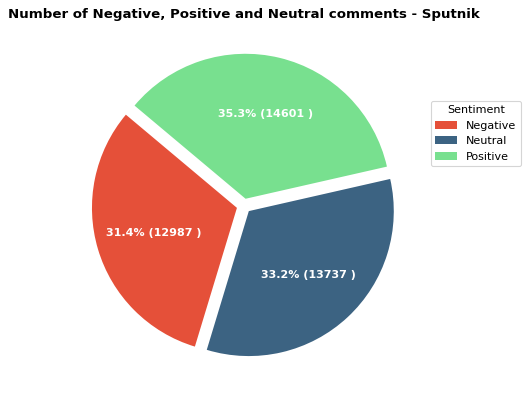

In [ ]:
wordcloud_df = sputnik_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Sputnik", fontsize=12, fontweight="bold")
plt.show()

In [ ]:
johnson_df, johnson_timeline = filter_by_vaccy(df, ['johnson'])

None


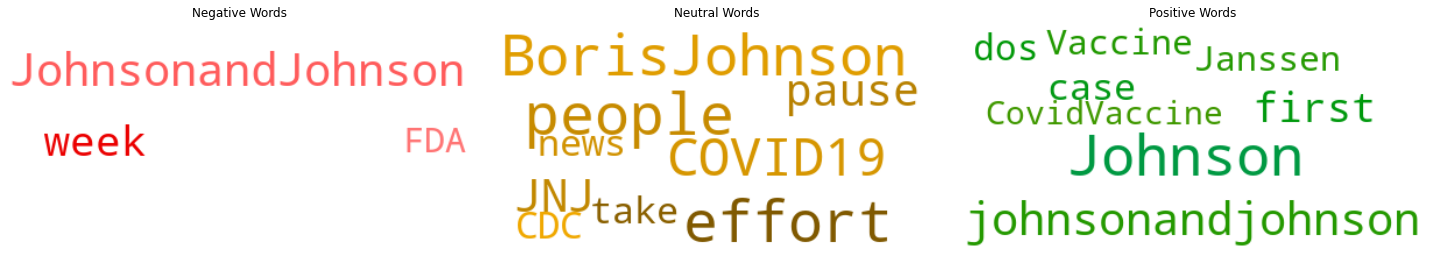

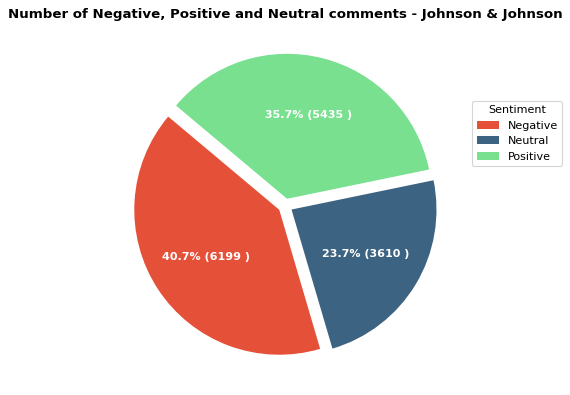

In [ ]:
wordcloud_df = johnson_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Johnson & Johnson", fontsize=12, fontweight="bold")
plt.show()

None


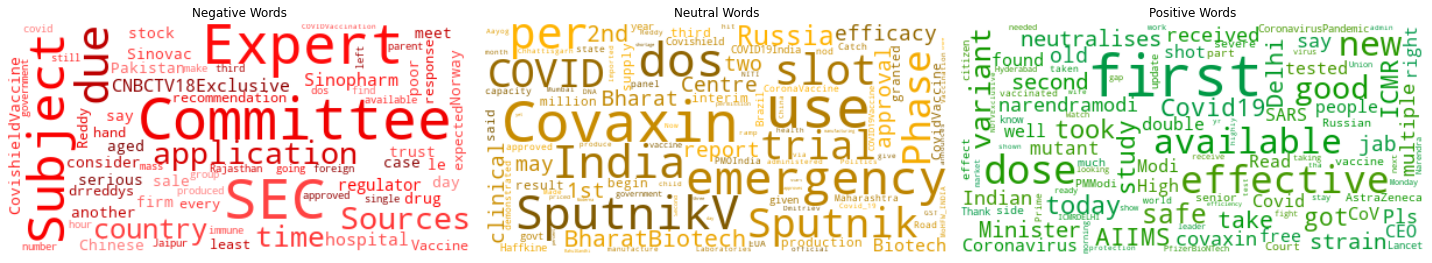

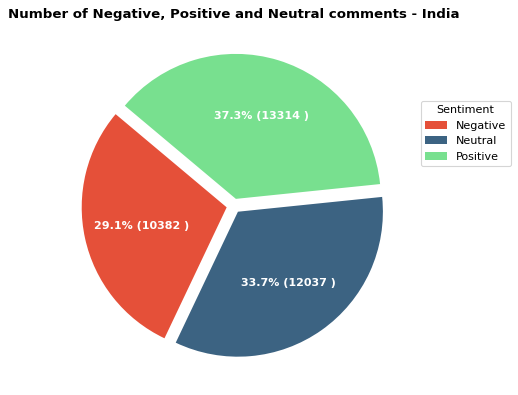

In [ ]:
wordcloud_df = india_words
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - India", fontsize=12, fontweight="bold")
plt.show()

None


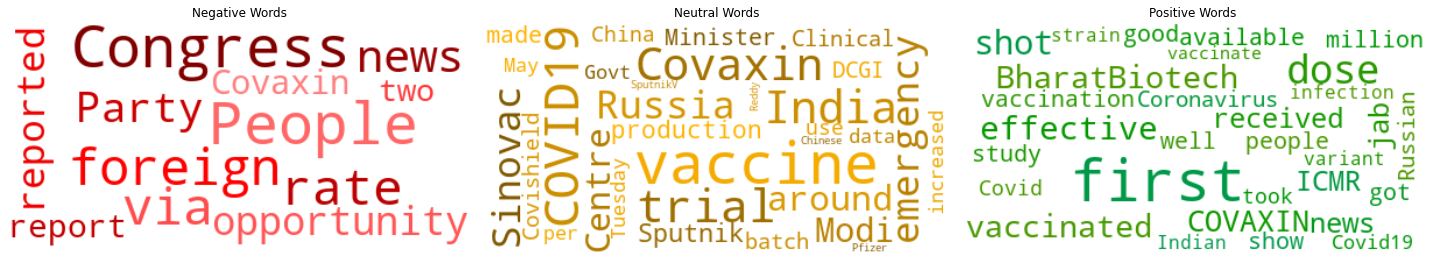

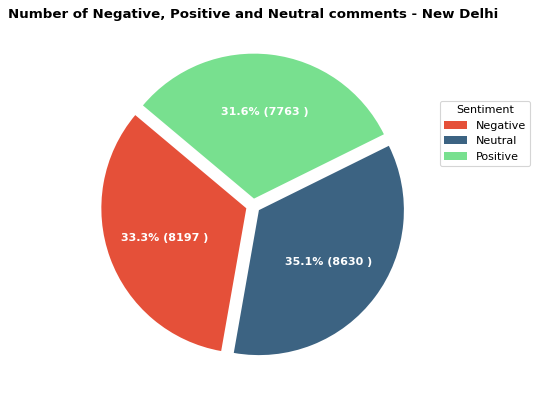

In [ ]:
wordcloud_df = delhi_words
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - New Delhi", fontsize=12, fontweight="bold")
plt.show()

None


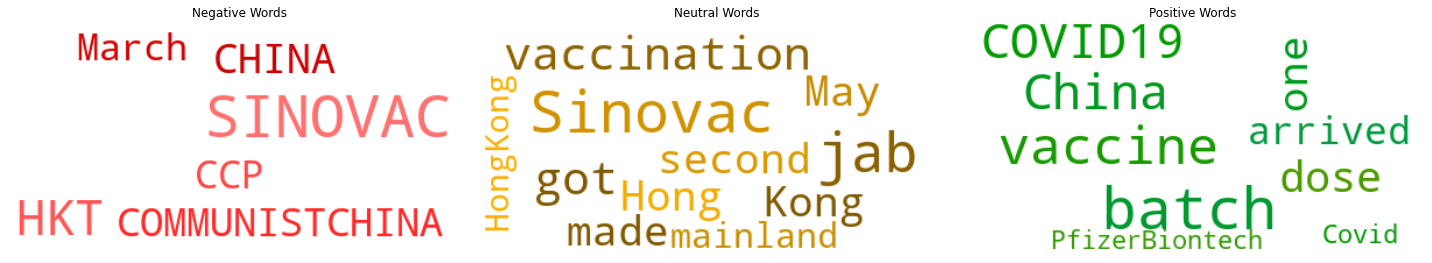

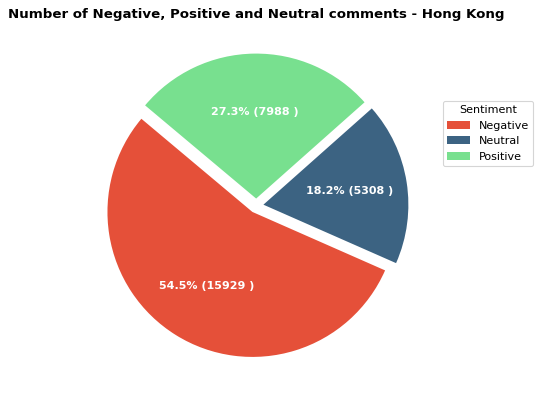

In [ ]:
wordcloud_df = hk_words
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Hong Kong", fontsize=12, fontweight="bold")
plt.show()

None


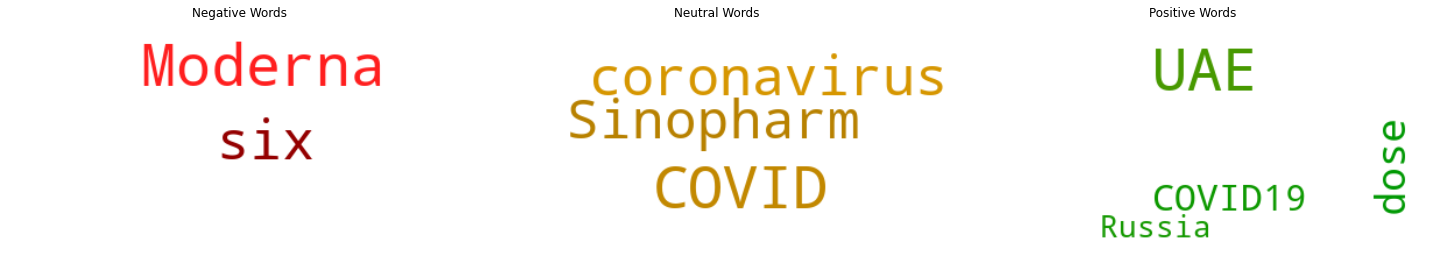

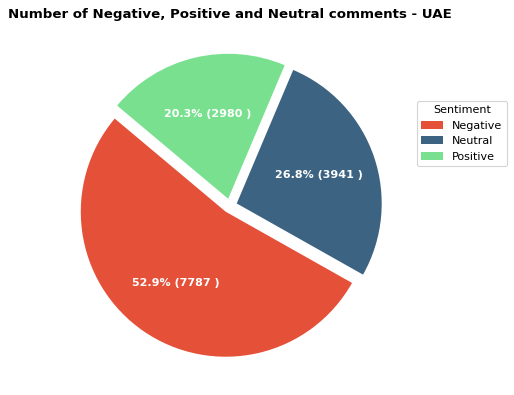

In [ ]:
wordcloud_df = uae_words
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - UAE", fontsize=12, fontweight="bold")
plt.show()

None


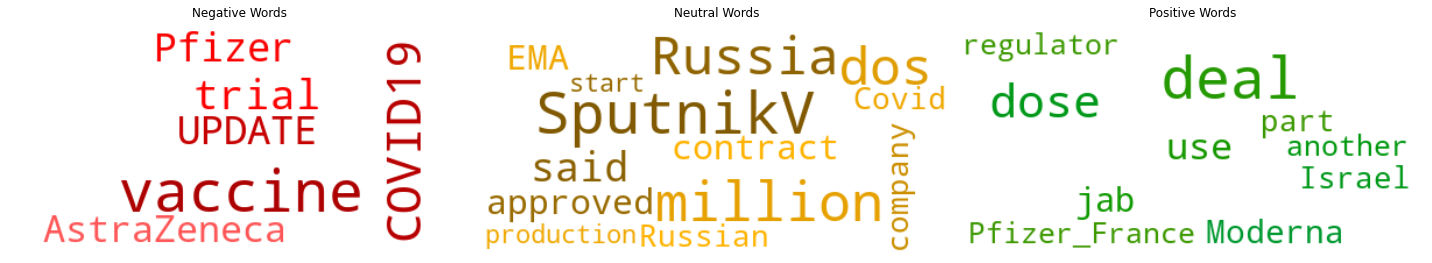

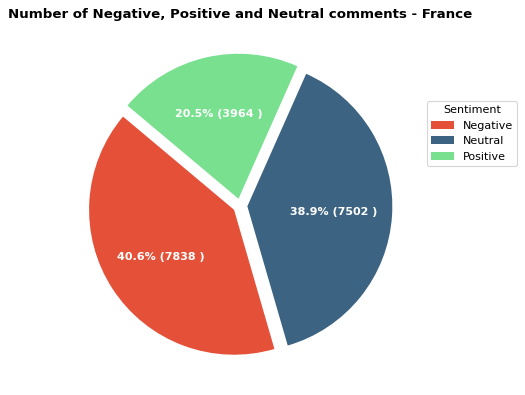

In [ ]:
wordcloud_df = france_words
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - France", fontsize=12, fontweight="bold")
plt.show()

None


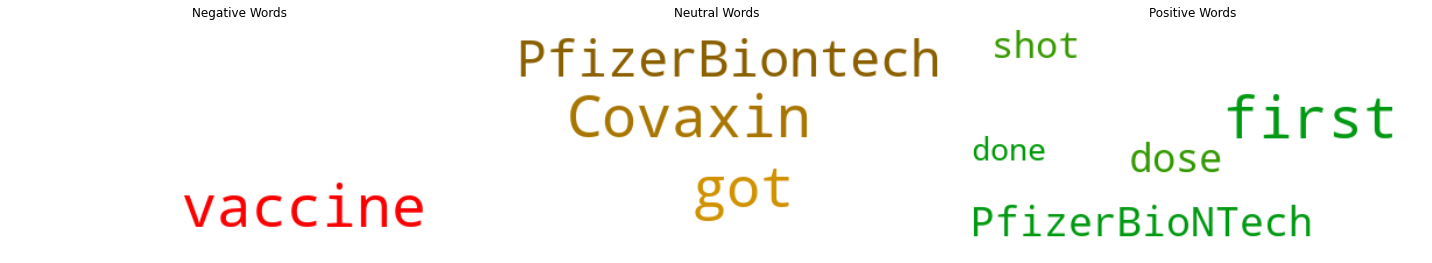

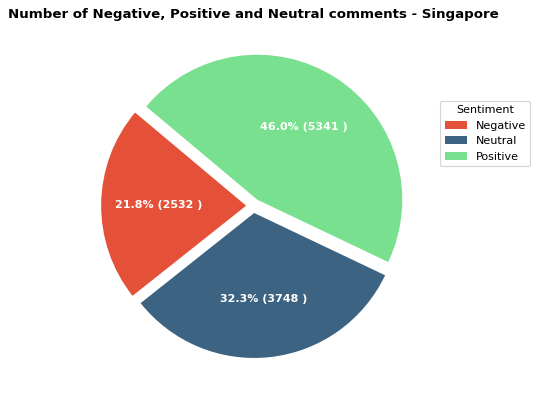

In [ ]:
wordcloud_df = singapore_words
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Singapore", fontsize=12, fontweight="bold")
plt.show()

None


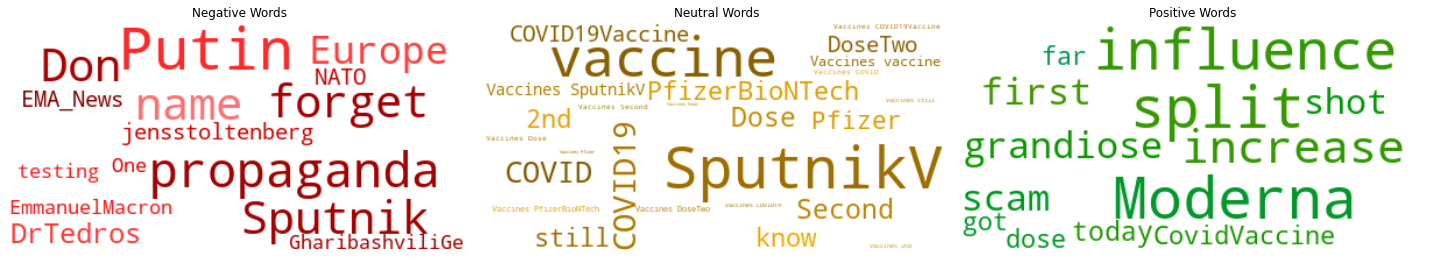

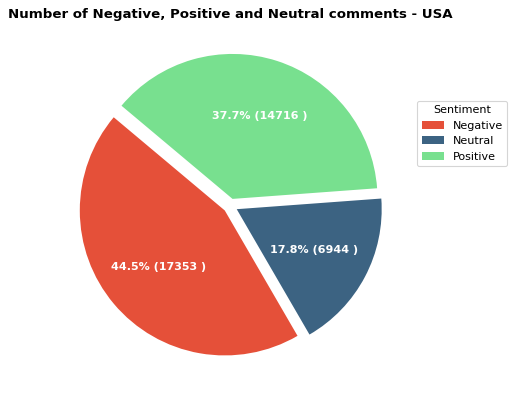

In [ ]:
wordcloud_df = usa_words
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - USA", fontsize=12, fontweight="bold")
plt.show()

None


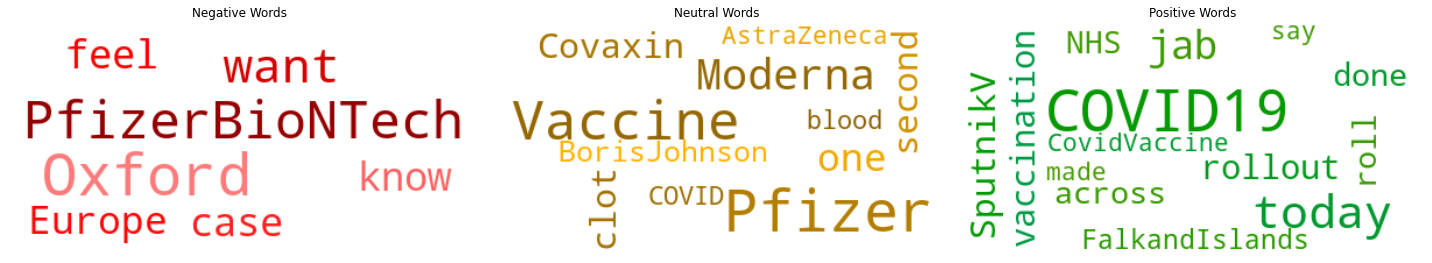

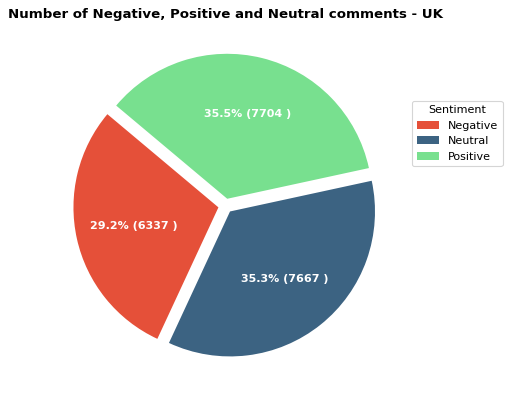

In [ ]:
wordcloud_df = united_words
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - UK", fontsize=12, fontweight="bold")
plt.show()

None


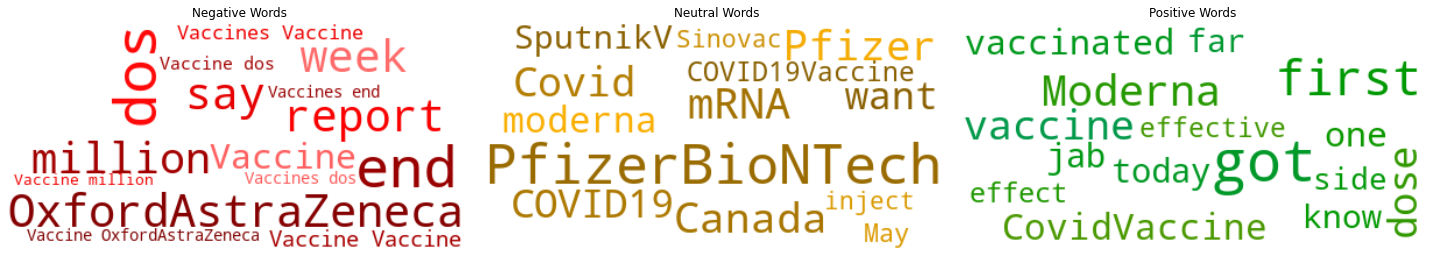

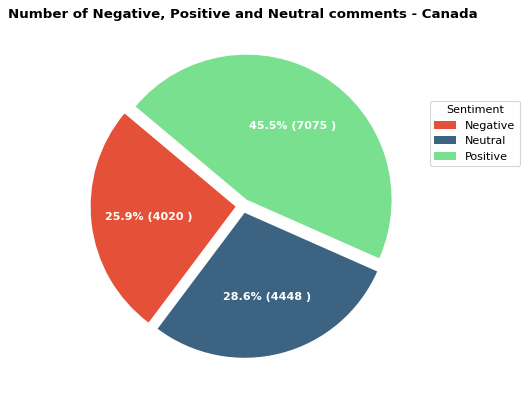

In [ ]:
wordcloud_df = canada_words
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Canada", fontsize=12, fontweight="bold")
plt.show()

None


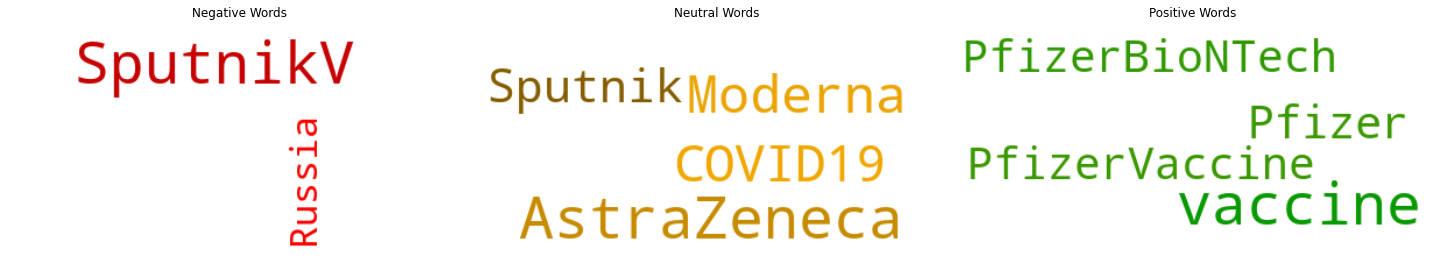

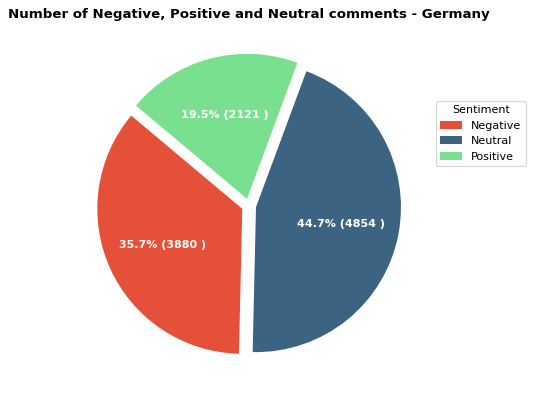

In [ ]:
wordcloud_df = germany_words
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Germany", fontsize=12, fontweight="bold")
plt.show()

None


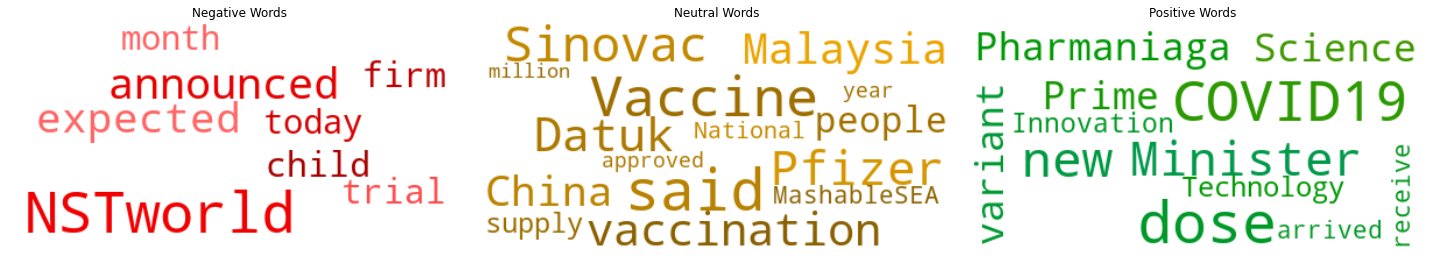

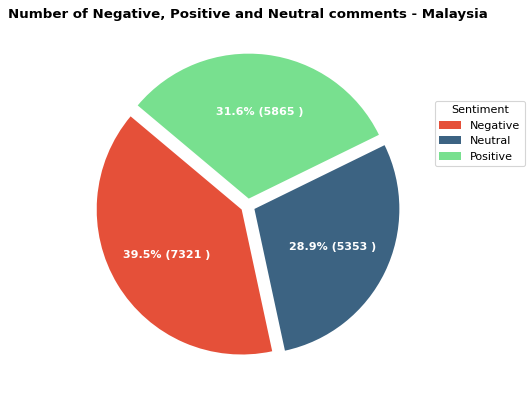

In [ ]:
wordcloud_df = malaysia_words
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
fig, neg, neu, pos = get_smart_clouds(wordcloud_df)
print(fig.savefig("sentiment_wordclouds.png", bbox_inches="tight"))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [len(neg), len(neu), len(pos)]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of Negative, Positive and Neutral comments - Malaysia", fontsize=12, fontweight="bold")
plt.show()